In [1]:
# load the single stars
import pandas as pd
import numpy as np
import custom_model
%pylab inline

# read labels for all single stars,
# even ones without RVS spectra
elbadry_singles_path = './data/label_dataframes/elbadry_singles_with_and_without_rvs_labels.csv'
single_df = pd.read_csv(elbadry_singles_path)

# remove nans
single_df = single_df.dropna(subset='grvs_mag')

# compute absolute magnitude from distances
single_df['grvs_abs_mag'] = single_df.grvs_mag - 5*np.log10(single_df.distance_gspphot/10)

print(len(single_df))

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
2690


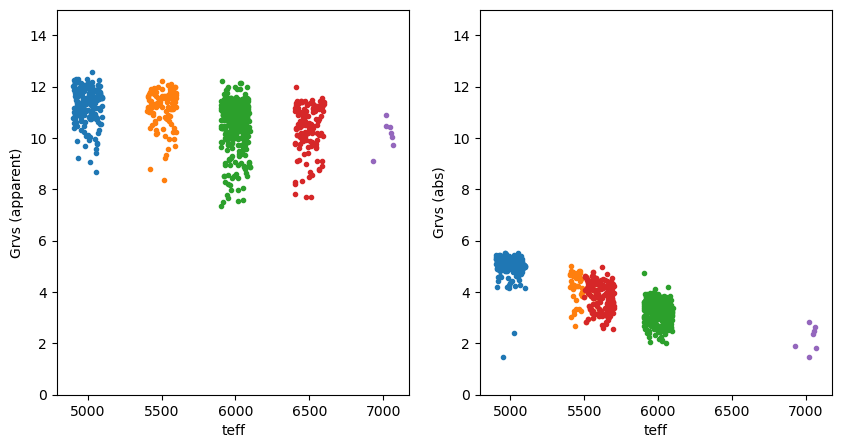

In [2]:
def plot_teff_vs_apparent_mag(teff, df):
    plot(df.query('abs(teff_gspphot - @teff)<100').teff_gspphot, 
         df.query('abs(teff_gspphot - @teff)<100').grvs_mag, '.')
    
def plot_teff_vs_absolute_mag(teff, df):
    plot(df.query('abs(teff_gspphot - @teff)<100').teff_gspphot, 
         df.query('abs(teff_gspphot - @teff)<100').grvs_abs_mag, '.')

def plot_magnitudes(df):
    figure(figsize=(10,5))
    subplot(121)
    plot_teff_vs_apparent_mag(5000, df)
    plot_teff_vs_apparent_mag(5500, df)
    plot_teff_vs_apparent_mag(6000, df)
    plot_teff_vs_apparent_mag(6500, df)
    plot_teff_vs_apparent_mag(7000, df)
    xlabel('teff');ylabel('Grvs (apparent)');ylim(0,15)

    subplot(122)
    plot_teff_vs_absolute_mag(5000, df)
    plot_teff_vs_absolute_mag(5500, df)
    plot_teff_vs_absolute_mag(6000, df)
    plot_teff_vs_absolute_mag(5600, df)
    plot_teff_vs_absolute_mag(7000, df)
    xlabel('teff');ylabel('Grvs (abs)');ylim(0,15)

plot_magnitudes(single_df)

Text(0.5, 1.0, 'distance error < 0.5pc')

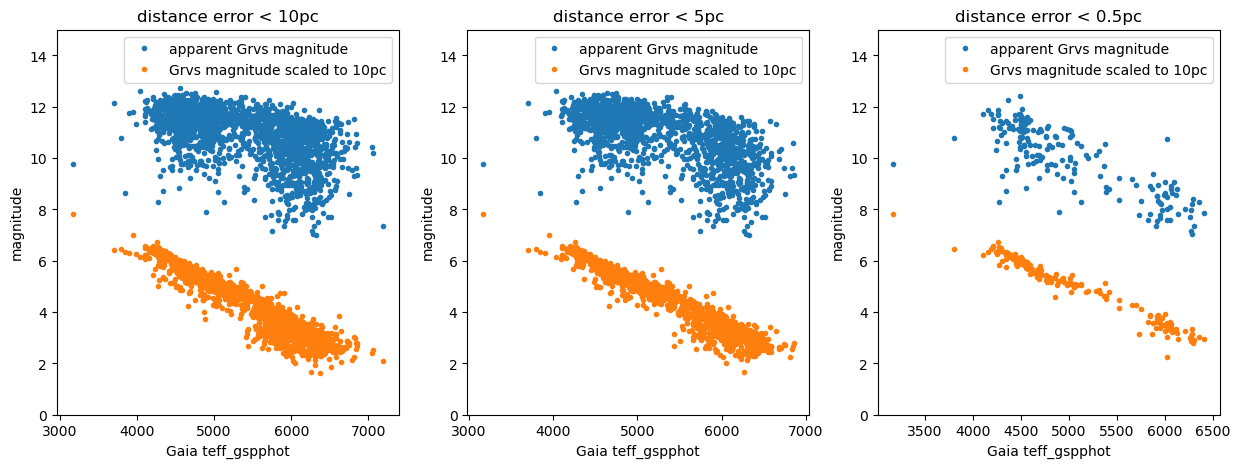

In [3]:
def plot_teff_vs_mags(df):
    plot(df.teff_gspphot, df.grvs_mag, '.', label='apparent Grvs magnitude')
    plot(df.teff_gspphot, df.grvs_abs_mag, '.', label='Grvs magnitude scaled to 10pc')
    legend();ylim(0,15)
    xlabel('Gaia teff_gspphot');ylabel('magnitude')
    
figure(figsize=(15,5))
subplot(131)
plot_teff_vs_mags(
    single_df.query('abs(distance_gspphot_upper - distance_gspphot_lower) < 10'))
title('distance error < 10pc')

subplot(132)
plot_teff_vs_mags(
    single_df.query('abs(distance_gspphot_upper - distance_gspphot_lower) < 5'))
title('distance error < 5pc')

subplot(133)
plot_teff_vs_mags(
    single_df.query('abs(distance_gspphot_upper - distance_gspphot_lower) < 0.5'))
title('distance error < 0.5pc')

Text(0.5, 1.0, 'full single star sample')

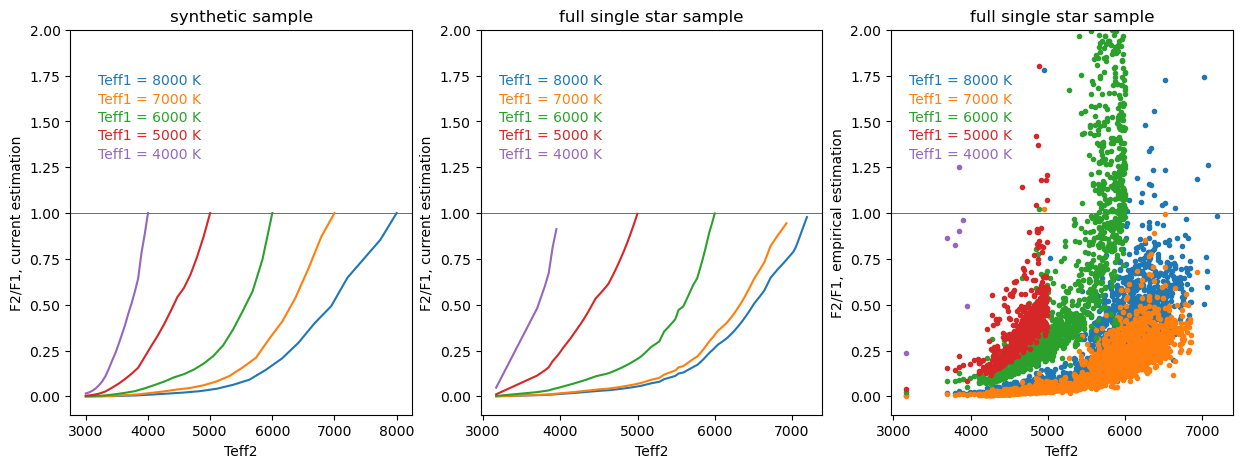

In [4]:
# here is a plot of the current estimation using a grid of teff1,teff2 values.
def plot_pm2013_flux_ratio_syn(teff1):
    # compute teff, magnitude of secondaries
    teff2 = np.linspace(3000,teff1,20)
    # compute flux ratio from before
    flux_ratio_arr = []
    for teff2_value in teff2:
        F1, F2 = custom_model.flux_weights(teff1, teff2_value)
        flux_ratio_arr.append(F2/F1)
    plot(teff2, flux_ratio_arr, '-')
    
def plot_pm2013_flux_ratio_emp(teff1_value, df):
    primary_row = df.iloc[np.argmin(abs(df.teff_gspphot - teff1_value))]
    teff1 = primary_row.teff_gspphot
    # compute teff, magnitude of secondaries
    secondary_df = df.query('teff_gspphot < @teff1').sort_values('teff_gspphot')
    teff2 = secondary_df.teff_gspphot
    # compute flux ratio from before
    flux_ratio_arr = []
    for teff2_value in teff2:
        F1, F2 = custom_model.flux_weights(teff1, teff2_value)
        flux_ratio_arr.append(F2/F1)
    plot(teff2, flux_ratio_arr, '-')
    
def plot_gaia_flux_ratio(teff1_value, df):
    primary_row = df.iloc[np.argmin(abs(df.teff_gspphot - teff1_value))]
    teff1 = primary_row.teff_gspphot
    # compute teff, magnitude of secondaries
    secondary_df = df.query('teff_gspphot < @teff1').sort_values('teff_gspphot')
    teff2 = secondary_df.teff_gspphot
    
    dmag = secondary_df.grvs_abs_mag - primary_row.grvs_abs_mag
    f1_over_f2 = 10**(dmag/2.5)
    flux_ratio_arr = 1/f1_over_f2
    plot(teff2, flux_ratio_arr, '.')


figure(figsize=(15,5))
subplot(131)
plot_pm2013_flux_ratio_syn(8000);text(3200,1.7,'Teff1 = 8000 K', color='C0')
plot_pm2013_flux_ratio_syn(7000);text(3200,1.6,'Teff1 = 7000 K', color='C1')
plot_pm2013_flux_ratio_syn(6000);text(3200,1.5,'Teff1 = 6000 K', color='C2')
plot_pm2013_flux_ratio_syn(5000);text(3200,1.4,'Teff1 = 5000 K', color='C3')
plot_pm2013_flux_ratio_syn(4000);text(3200,1.3,'Teff1 = 4000 K', color='C4')
xlabel('Teff2');ylim(-0.1,2)
axhline(1, color='k',lw=0.4, zorder=0)
ylabel('F2/F1, current estimation');title('synthetic sample')

subplot(132)
plot_pm2013_flux_ratio_emp(8000, single_df);text(3200,1.7,'Teff1 = 8000 K', color='C0')
plot_pm2013_flux_ratio_emp(7000, single_df);text(3200,1.6,'Teff1 = 7000 K', color='C1')
plot_pm2013_flux_ratio_emp(6000, single_df);text(3200,1.5,'Teff1 = 6000 K', color='C2')
plot_pm2013_flux_ratio_emp(5000, single_df);text(3200,1.4,'Teff1 = 5000 K', color='C3')
plot_pm2013_flux_ratio_emp(4000, single_df);text(3200,1.3,'Teff1 = 4000 K', color='C4')
xlabel('Teff2');ylim(-0.1,2)
axhline(1, color='k',lw=0.4, zorder=0)
ylabel('F2/F1, current estimation');title('full single star sample')

subplot(133)
plot_gaia_flux_ratio(8000, single_df);text(3200,1.7,'Teff1 = 8000 K', color='C0')
plot_gaia_flux_ratio(7000, single_df);text(3200,1.6,'Teff1 = 7000 K', color='C1')
plot_gaia_flux_ratio(6000, single_df);text(3200,1.5,'Teff1 = 6000 K', color='C2')
plot_gaia_flux_ratio(5000, single_df);text(3200,1.4,'Teff1 = 5000 K', color='C3')
plot_gaia_flux_ratio(4000, single_df);text(3200,1.3,'Teff1 = 4000 K', color='C4')
xlabel('Teff2');ylim(-0.1,2)
axhline(1, color='k',lw=0.4, zorder=0)
ylabel('F2/F1, empirical estimation');title('full single star sample')

Text(0.5, 1.0, 'single star sample, distance error < 0.5pc')

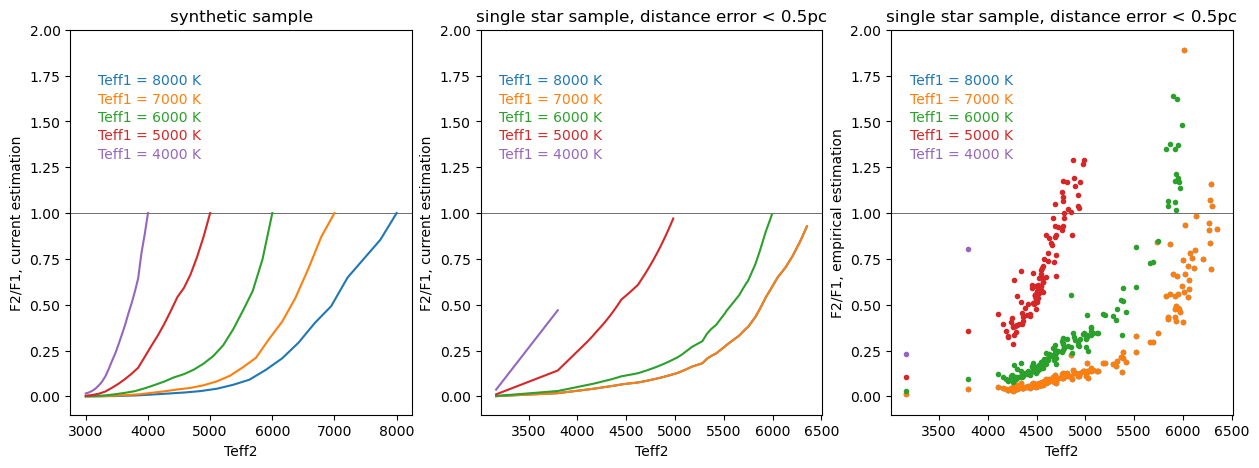

In [5]:
# next I need to make the same figure but replace the right panels with the cleaned sample
# but NOTE: the blue curve in the reasl sample is based on Teff1=7200
# because there weren't any hotter stars to use.
# but tl; dr - it looks like the cleaned sample agrees with our estimates

single_df_cleaned = single_df.query('abs(distance_gspphot_upper - distance_gspphot_lower) < 0.5')

figure(figsize=(15,5))
subplot(131)
plot_pm2013_flux_ratio_syn(8000);text(3200,1.7,'Teff1 = 8000 K', color='C0')
plot_pm2013_flux_ratio_syn(7000);text(3200,1.6,'Teff1 = 7000 K', color='C1')
plot_pm2013_flux_ratio_syn(6000);text(3200,1.5,'Teff1 = 6000 K', color='C2')
plot_pm2013_flux_ratio_syn(5000);text(3200,1.4,'Teff1 = 5000 K', color='C3')
plot_pm2013_flux_ratio_syn(4000);text(3200,1.3,'Teff1 = 4000 K', color='C4')
xlabel('Teff2');ylim(-0.1,2)
axhline(1, color='k',lw=0.4, zorder=0)
ylabel('F2/F1, current estimation');title('synthetic sample')

subplot(132)
plot_pm2013_flux_ratio_emp(8000, single_df_cleaned);text(3200,1.7,'Teff1 = 8000 K', color='C0')
plot_pm2013_flux_ratio_emp(7000, single_df_cleaned);text(3200,1.6,'Teff1 = 7000 K', color='C1')
plot_pm2013_flux_ratio_emp(6000, single_df_cleaned);text(3200,1.5,'Teff1 = 6000 K', color='C2')
plot_pm2013_flux_ratio_emp(5000, single_df_cleaned);text(3200,1.4,'Teff1 = 5000 K', color='C3')
plot_pm2013_flux_ratio_emp(4000, single_df_cleaned);text(3200,1.3,'Teff1 = 4000 K', color='C4')
xlabel('Teff2');ylim(-0.1,2)
axhline(1, color='k',lw=0.4, zorder=0)
ylabel('F2/F1, current estimation');title('single star sample, distance error < 0.5pc')

subplot(133)
plot_gaia_flux_ratio(8000, single_df_cleaned);text(3200,1.7,'Teff1 = 8000 K', color='C0')
plot_gaia_flux_ratio(7000, single_df_cleaned);text(3200,1.6,'Teff1 = 7000 K', color='C1')
plot_gaia_flux_ratio(6000, single_df_cleaned);text(3200,1.5,'Teff1 = 6000 K', color='C2')
plot_gaia_flux_ratio(5000, single_df_cleaned);text(3200,1.4,'Teff1 = 5000 K', color='C3')
plot_gaia_flux_ratio(4000, single_df_cleaned);text(3200,1.3,'Teff1 = 4000 K', color='C4')
xlabel('Teff2');ylim(-0.1,2)
axhline(1, color='k',lw=0.4, zorder=0)
ylabel('F2/F1, empirical estimation');title('single star sample, distance error < 0.5pc')

In [6]:
# let me re-write this

import itertools
teff_pairs = list(itertools.combinations(single_df_cleaned.teff_gspphot, 2))

teff1_arr=[];teff2_arr=[];n_binaries_arr=[]
emp_flux_ratio_arr=[];model_flux_ratio_arr=[]
for teff_pair in teff_pairs:
    
    # compute primary, secondary teff
    teff1 = max(teff_pair)
    teff2 = min(teff_pair)
    teff1_arr.append(teff1)
    teff2_arr.append(teff2)
    
    # add binary in bin count
    n_binaries_arr.append(1)
    
    # find corresponding rows in table
    idx1 = np.argmin(abs(single_df_cleaned.teff_gspphot-teff1))
    idx2 = np.argmin(abs(single_df_cleaned.teff_gspphot-teff2))
    row1 = single_df_cleaned.iloc[idx1]
    row2 = single_df_cleaned.iloc[idx2]
    
    # compute empirical flux ratio
    dmag = row2.grvs_abs_mag - row1.grvs_abs_mag
    f1_over_f2 = 10**(dmag/2.5)
    f2_over_f1 = 1/f1_over_f2
    emp_flux_ratio_arr.append(f2_over_f1)
    
    # compute model flux ratio
    F1, F2 = custom_model.flux_weights(teff1, teff2)
    model_flux_ratio_arr.append(F2/F1)

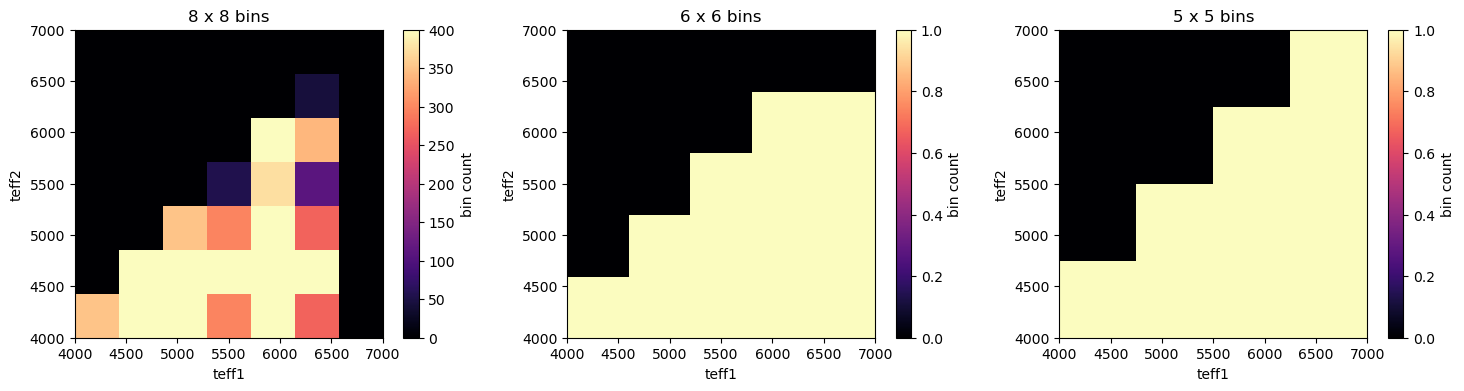

In [16]:
from scipy.stats import binned_statistic_2d

def plot_2d_hist_mean(arr, nbins, vmaxval, cbarlabel=None, stat='mean', vminval=0):
    binx = np.linspace(4000,7000, nbins)
    bin_stats, _, _, _ = binned_statistic_2d(
        teff1_arr, 
        teff2_arr, 
        arr,
        bins=[binx,binx],
        statistic=stat)

    plt.imshow(bin_stats.T, origin='lower', cmap='magma', vmin=vminval, vmax=vmaxval,
              extent=[4000, 7000, 4000, 7000])
    plt.colorbar(label=cbarlabel)
    plt.xlabel('teff1')
    plt.ylabel('teff2')

figure(figsize=(18,4))
subplot(131);title('8 x 8 bins')
plot_2d_hist_mean(n_binaries_arr, 8, 400, stat='count', cbarlabel='bin count')
subplot(132);title('6 x 6 bins')
plot_2d_hist_mean(n_binaries_arr,6,1, stat='count', cbarlabel='bin count')
subplot(133);title('5 x 5 bins')
plot_2d_hist_mean(n_binaries_arr,5, 1, stat='count', cbarlabel='bin count')

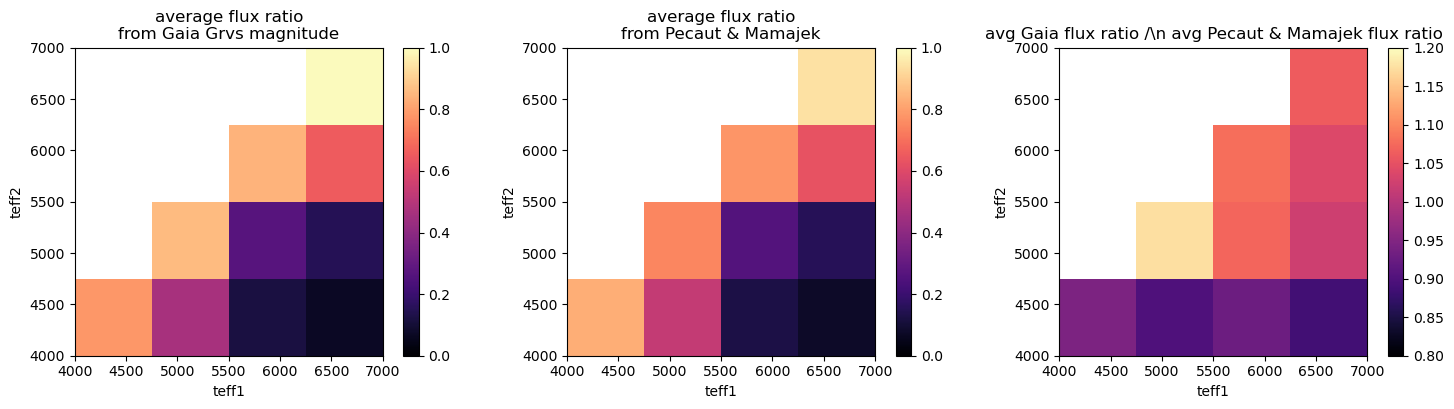

In [29]:
figure(figsize=(18,4))
subplot(131);title('average flux ratio\nfrom Gaia Grvs magnitude')
plot_2d_hist_mean(emp_flux_ratio_arr, 5, 1)
subplot(132);title('average flux ratio\nfrom Pecaut & Mamajek')
plot_2d_hist_mean(model_flux_ratio_arr, 5, 1)
subplot(133);title('average difference\nin flux ratio estimates')
subplot(133);title(r'avg Gaia flux ratio /\n avg Pecaut & Mamajek flux ratio')
flux_ratio_diff_arr = abs(np.array(emp_flux_ratio_arr)/np.array(model_flux_ratio_arr))
plot_2d_hist_mean(flux_ratio_diff_arr, 5, 1.2, vminval=0.8)

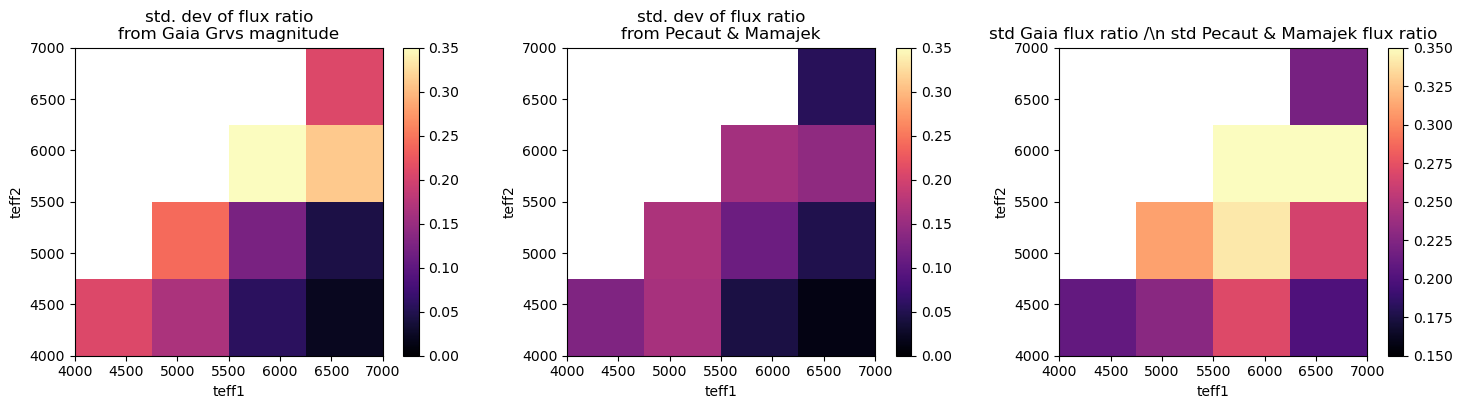

In [33]:
figure(figsize=(18,4))
subplot(131);title('std. dev of flux ratio\nfrom Gaia Grvs magnitude')
plot_2d_hist_mean(emp_flux_ratio_arr, 5, 0.35, stat='std')
subplot(132);title('std. dev of flux ratio\nfrom Pecaut & Mamajek')
plot_2d_hist_mean(model_flux_ratio_arr, 5, 0.35, stat='std')
subplot(133);title(r'std Gaia flux ratio /\n std Pecaut & Mamajek flux ratio')
flux_ratio_diff_arr = abs(np.array(emp_flux_ratio_arr) / np.array(model_flux_ratio_arr))
plot_2d_hist_mean(flux_ratio_diff_arr, 5, 0.35, stat='std', vminval=0.15)

In [10]:
# next I need to write all this up...
# and then I can move on to training the cannon on multiple orders
# running the statistics
# and working on the s2 calculation.
# let me take a quick break.
